In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
df=pd.read_csv("D:/ML DataSet/Sales prediction/Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]== 'object':
        cat_col.append(x)
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [10]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [11]:
# We will fill the missing value
item_weight_mean=df.pivot_table(values='Item_Weight',index='Item_Identifier')

In [12]:
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
miss_bool= df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
import sys
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] =np.mean(df['Item_Weight'])

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df['Item_Weight'].isnull().sum()

0

In [16]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
outlet_size_mode= df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool= df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size']= df.loc[miss_bool,'Outlet_Type'].apply(lambda x : outlet_size_mode[x])

In [19]:
df['Outlet_Size'].isnull().sum()

0

In [20]:
sum(df['Item_Visibility']==0)

526

In [21]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [22]:
sum(df['Item_Visibility']==0)

0

In [23]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
#COmbine item for content
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df['New_Item_Type']= df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [26]:
df['New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [27]:
df['New_Item_Type']= df['New_Item_Type'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [28]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [29]:
#We will cretae small values for establishment year
df['Outlet_Years']= 2013- df['Outlet_Establishment_Year']

In [30]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

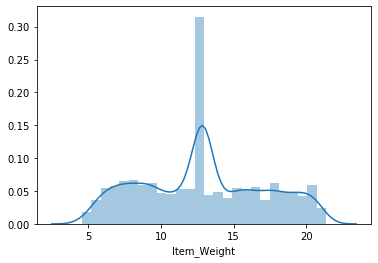

In [31]:
# Now we will do EDA
import seaborn as sns
sns.distplot(df['Item_Weight'])

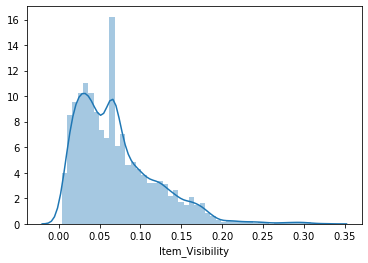

In [32]:
sns.distplot(df['Item_Visibility'])

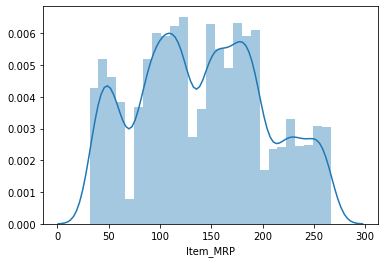

In [33]:
sns.distplot(df['Item_MRP'])

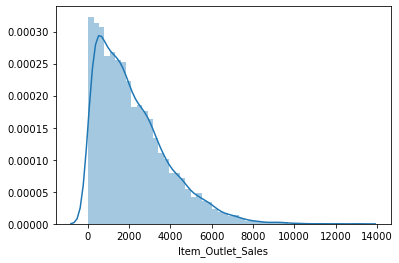

In [34]:
sns.distplot(df['Item_Outlet_Sales'])

In [35]:
#Since data for Item Outlet Slaes is skewed, so we will do log transformation for this
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

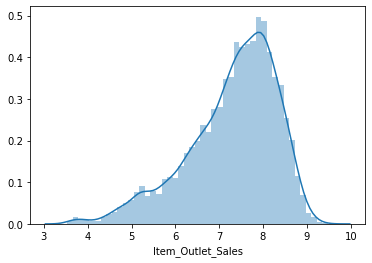

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

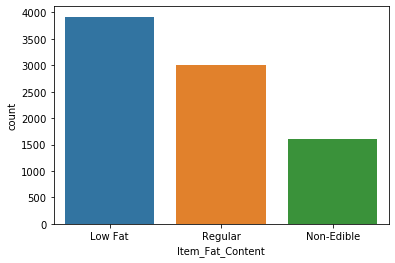

In [37]:
#Now we will visualise the categorical dataset
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

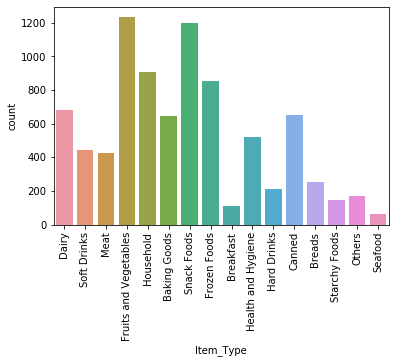

In [38]:
l=list(df['Item_Type'].unique())
chart= sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l, rotation=90)

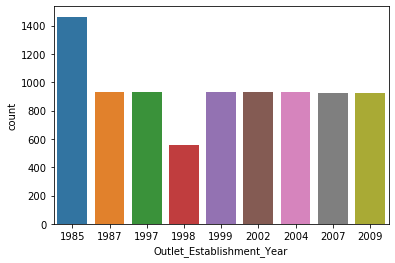

In [39]:
sns.countplot(df['Outlet_Establishment_Year'])

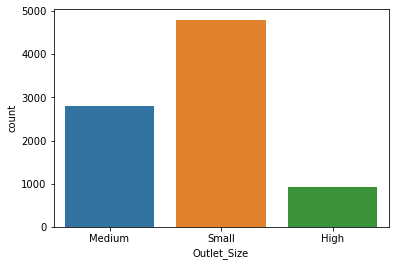

In [40]:
sns.countplot(df['Outlet_Size'])

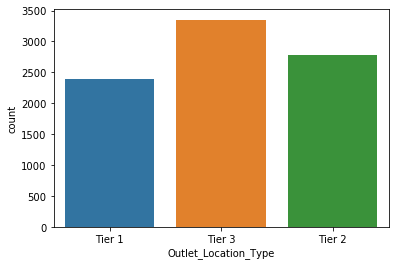

In [41]:
sns.countplot(df['Outlet_Location_Type'])

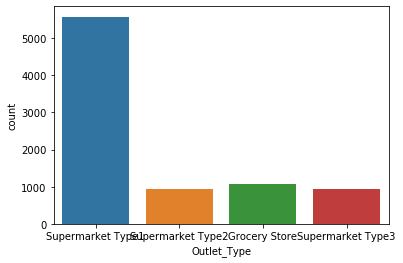

In [42]:
sns.countplot(df['Outlet_Type'])

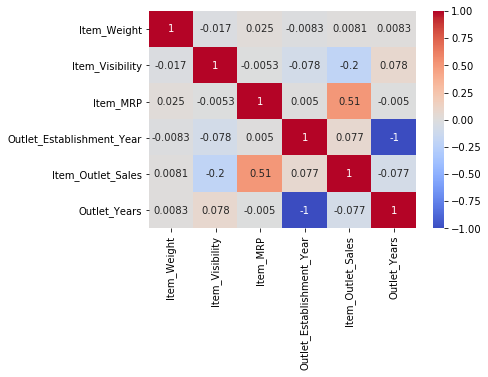

In [43]:
corr= df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet']= le.fit_transform(df['Outlet_Identifier'])
cat_col= ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col]= le.fit_transform(df[col])

In [45]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [48]:
#Train Test Split
x=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    model.fit(x,y)
    pred= model.predict(x)
    cv_score= cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10)
    cv_score=np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE',mean_squared_error(y,pred))
    print("CV Score",cv_score)

Model Report
MSE 0.2880334179343937
CV Score 0.28928142513508065


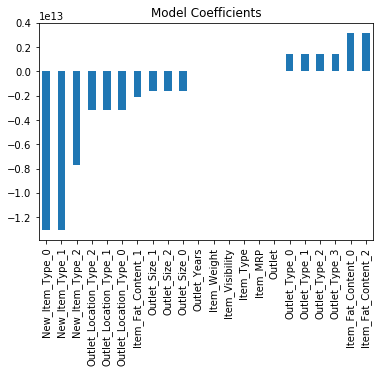

In [63]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model= LinearRegression(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")

In [61]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

Model Report
MSE 0.42802985605683475
CV Score 0.4288567729204103


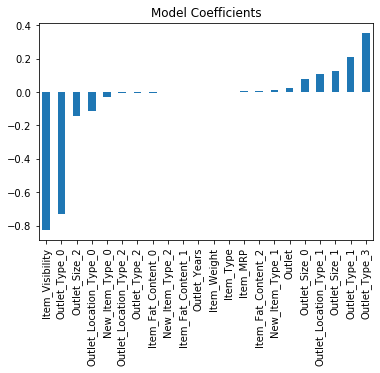

In [64]:
model= Ridge(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")

Model Report
MSE 0.7628688679102086
CV Score 0.7630993036091038


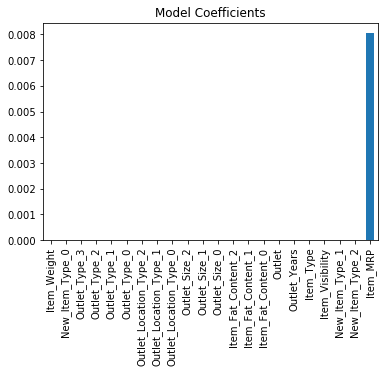

In [66]:
model= Lasso()
train(model,x,y)
coef= pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")

Model Report
MSE 9.251544668064852e-11
CV Score 0.5691534466174027


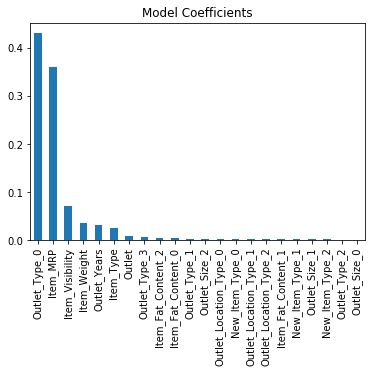

In [68]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Model Coefficients")

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report
MSE 0.05702826677240691
CV Score 0.33345652542741755


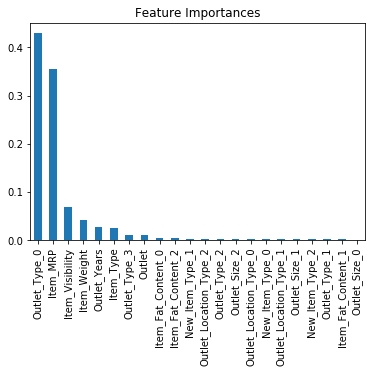

In [70]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Feature Importances")

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report
MSE 2.3159231857013962e-12
CV Score 0.3507994228595402


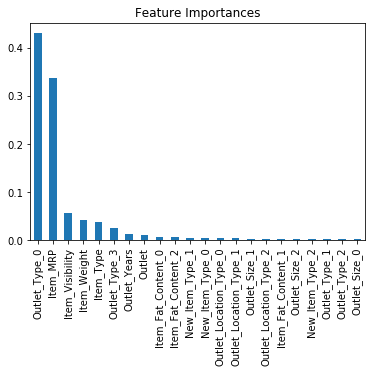

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Feature Importances")